# Here we go, on our crop recommendation journey!!

## Lets import required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [3]:
df=pd.read_csv("Crop_recommendation.csv")

In [4]:
df.head() #lets get first 5 values of our data.

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape # numbers of rows and columns

(2200, 8)

In [6]:
df.isnull().sum()# let me know how much null values are there

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.duplicated().sum()#lets check number of duplicate values

0

In [8]:
df.columns.unique()# how many unique columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.describe()# gives decription of numerical columns

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.info() # basic information of type of data in our data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df["label"].unique()# here are names of our crops(lables)

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Visualizing data with Exploratory Data Analysis

## Here are our BarCharts for each parameter

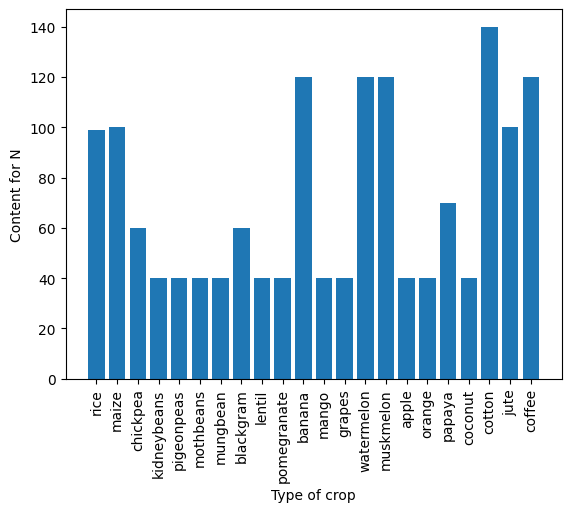

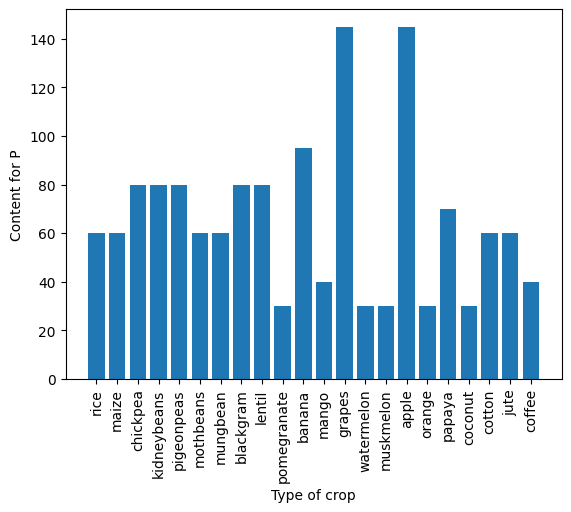

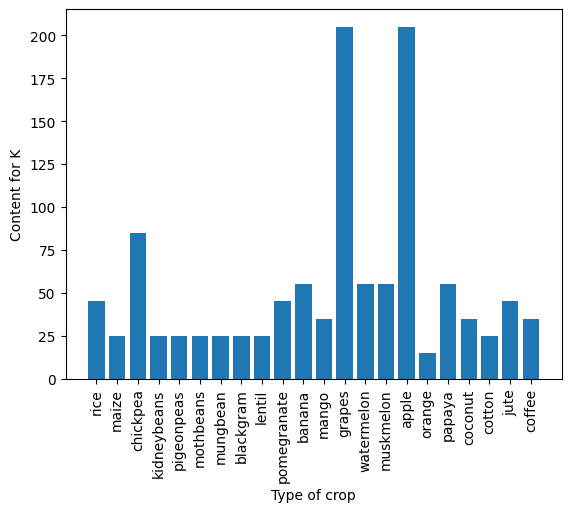

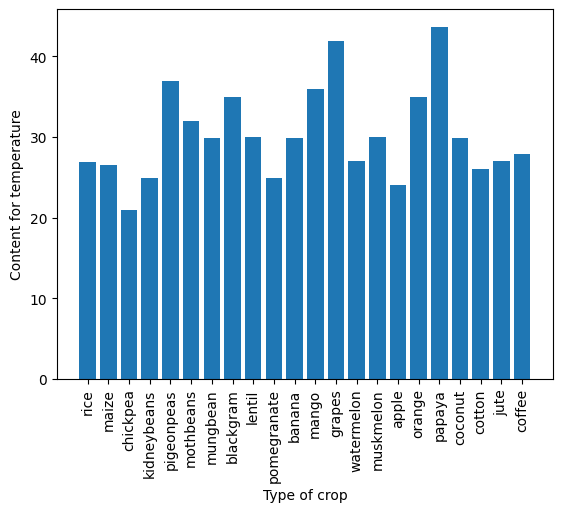

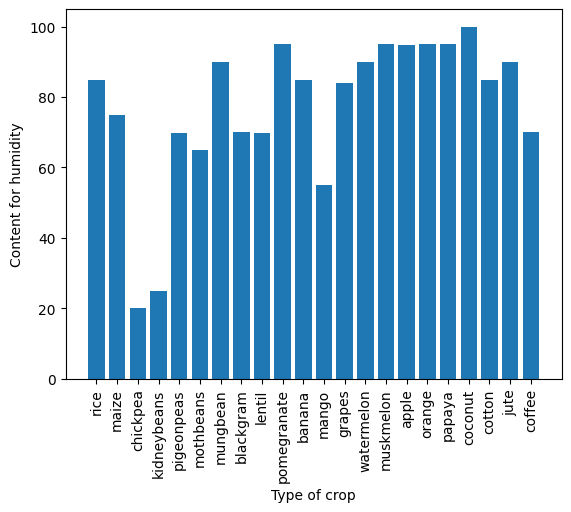

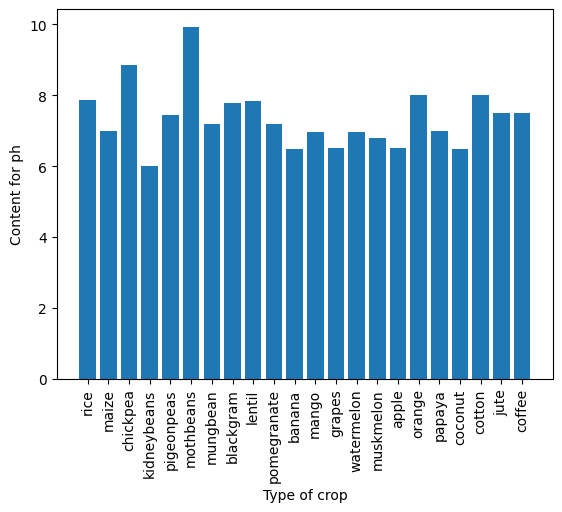

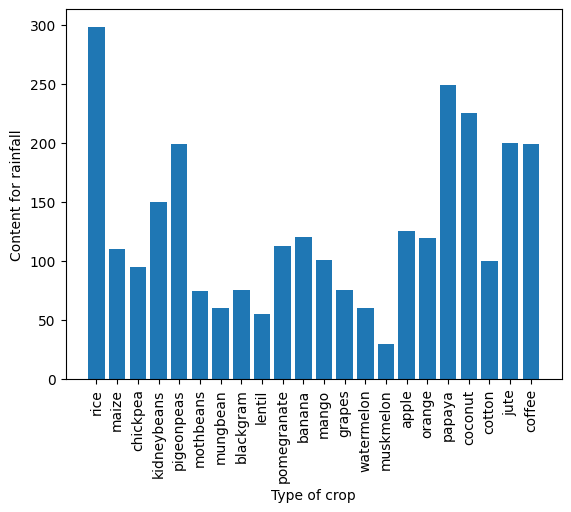

In [12]:
# a for loop is used here to get bar chart representing relation between each feature and all labels
parameter=['N','P','K','temperature','humidity','ph','rainfall']
for i in parameter:
    plt.bar('label',i,data=df)
    plt.xlabel("Type of crop")
    plt.xticks(rotation=90)
    plt.ylabel(f'Content for {i}')
    plt.show()

## Our colourful piechart representing proportion of each crop

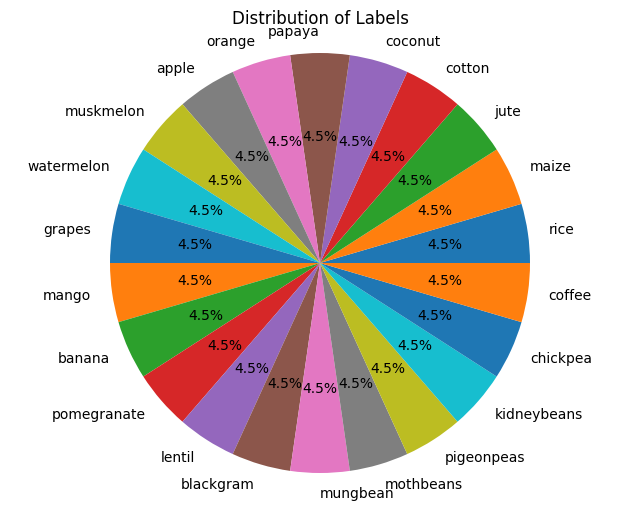

In [13]:
label_counts = df['label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Outlier Detection using Boxplot

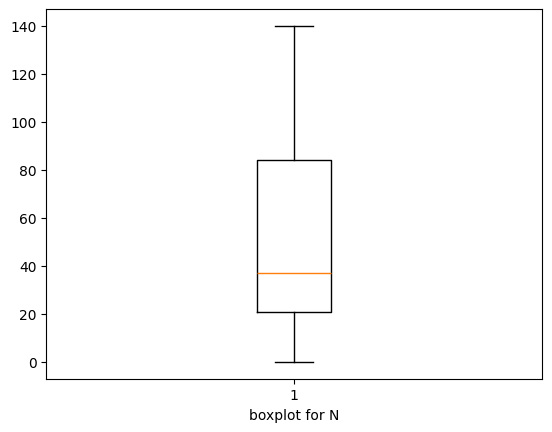

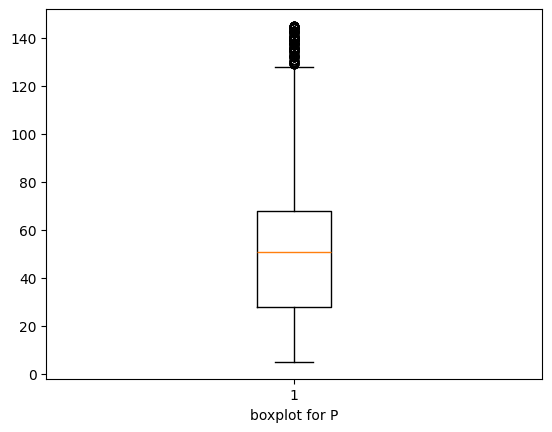

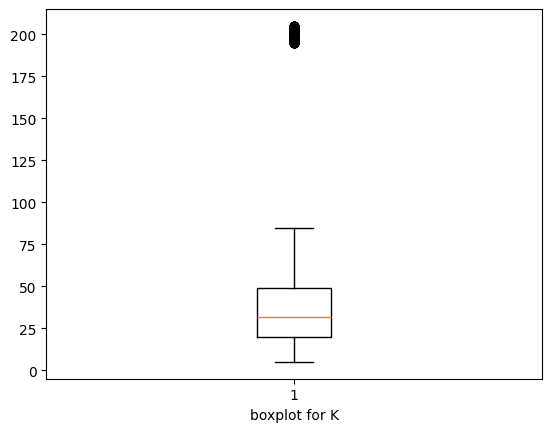

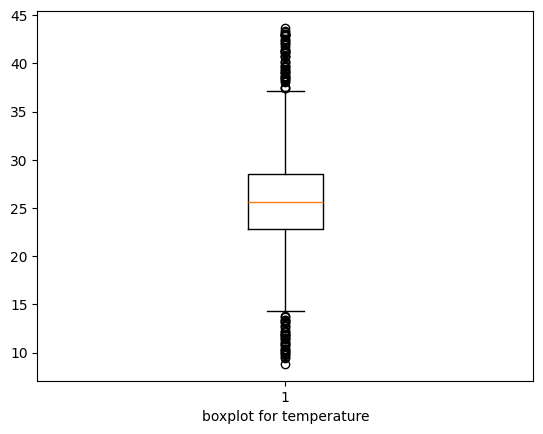

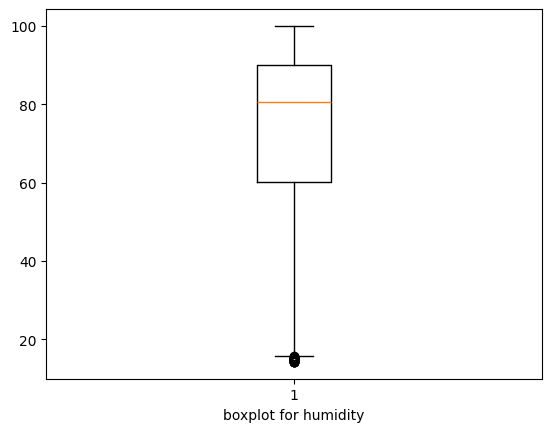

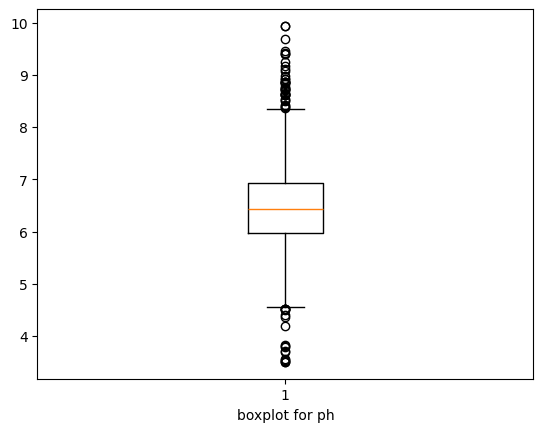

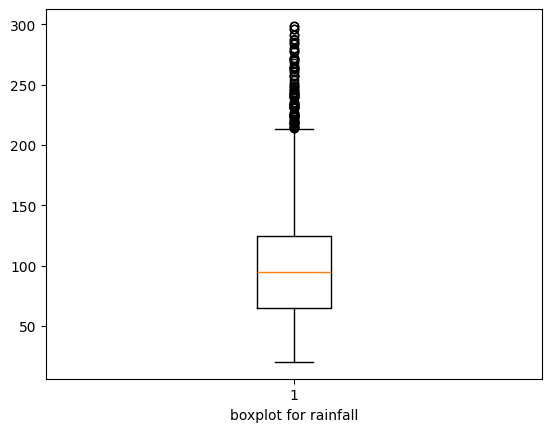

In [14]:
for i in parameter:
    plt.boxplot(x=df[i])
    plt.xlabel(f'boxplot for {i}')
    plt.show()

## Histogram for better understanding of frequency of each parameter

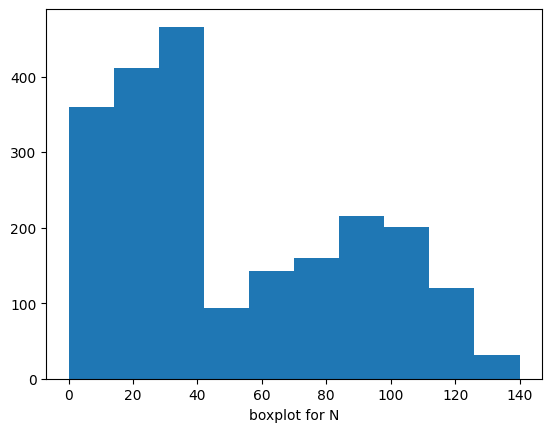

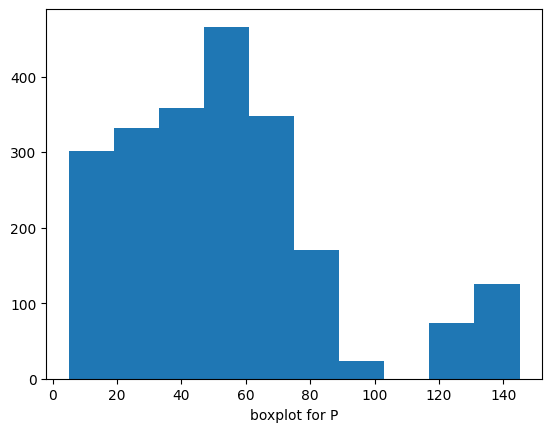

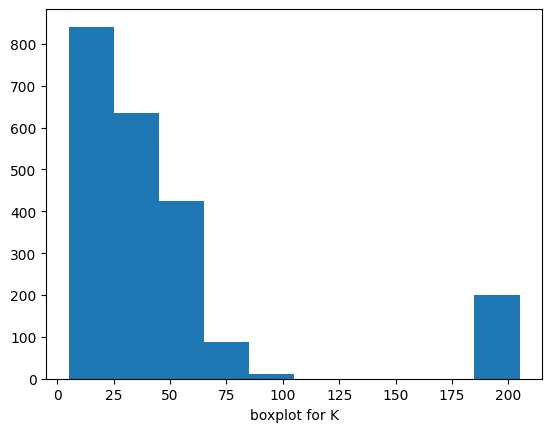

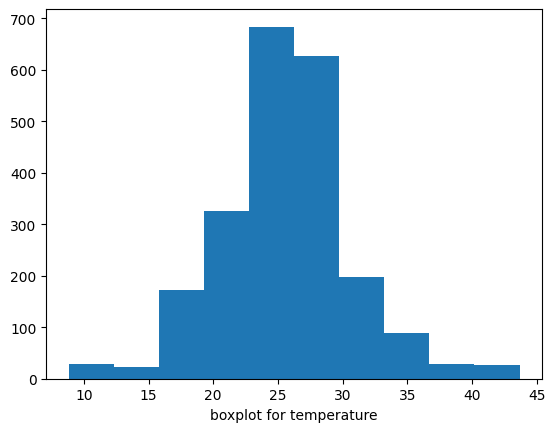

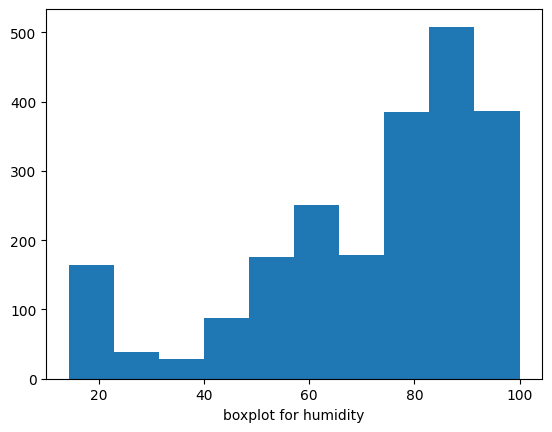

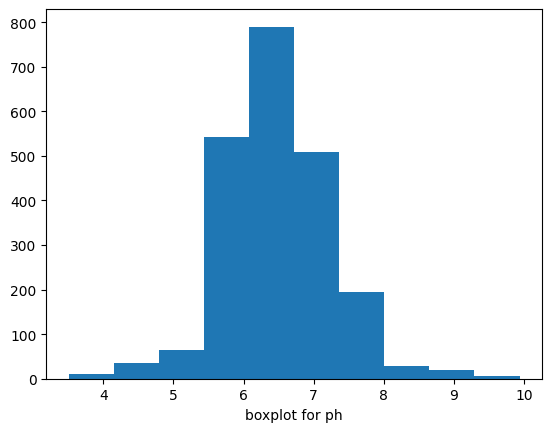

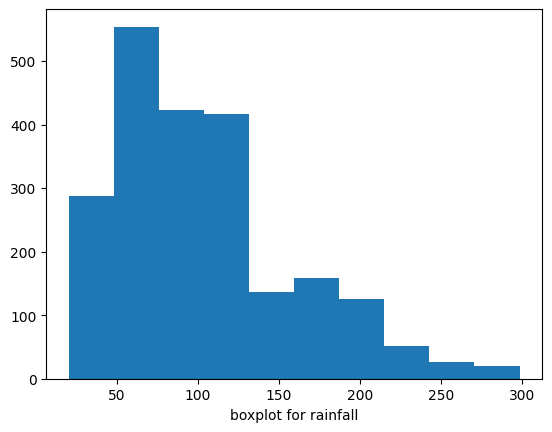

In [15]:
for i in parameter:
    plt.hist(x=df[i])
    plt.xlabel(f'boxplot for {i}')
    plt.show()

In [16]:
df.sample(22)# lets take a few random samples.

,N,P,K,temperature,humidity,ph,rainfall,label
966,3,27,44,24.568112,92.030092,6.591303,110.963389,pomegranate
1793,58,55,47,26.053758,93.691117,6.742490,240.686390,papaya
840,5,65,19,18.280722,68.103654,6.978362,48.802533,lentil
1909,129,60,22,24.584531,79.124042,5.947449,71.946081,cotton
1569,3,141,197,21.981419,91.127193,6.142803,115.478915,apple
576,24,45,19,26.858519,48.824639,5.952385,34.742646,mothbeans
1667,36,29,13,20.681852,90.915105,7.829507,109.751393,orange
1946,131,38,19,23.868140,75.683397,6.814342,90.454718,cotton
1430,100,17,48,29.727911,94.297533,6.367801,26.523641,muskmelon
175,77,52,17,24.863749,65.742005,5.714800,75.822705,maize


In [17]:
# Lets define our X and y variables
X=df.drop(["label"],axis=1)# Drop label column
y=df["label"]

## Splitting training and testing data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## We are going to classify our data with the help of Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier( random_state=2)
m.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [20]:
y_predict=m.predict(X_test)# prediction work going on

In [21]:
y_predict

array(['lentil', 'orange', 'pomegranate', 'jute', 'coconut', 'jute',
       'grapes', 'maize', 'mango', 'pigeonpeas', 'muskmelon', 'coconut',
       'coconut', 'maize', 'apple', 'orange', 'mothbeans', 'maize',
       'banana', 'mothbeans', 'orange', 'maize', 'kidneybeans', 'mango',
       'rice', 'rice', 'chickpea', 'cotton', 'jute', 'orange', 'mungbean',
       'chickpea', 'jute', 'banana', 'grapes', 'lentil', 'mothbeans',
       'rice', 'coconut', 'mungbean', 'cotton', 'orange', 'chickpea',
       'jute', 'maize', 'pigeonpeas', 'mothbeans', 'papaya', 'coffee',
       'orange', 'maize', 'banana', 'maize', 'kidneybeans', 'blackgram',
       'jute', 'papaya', 'watermelon', 'coconut', 'pigeonpeas', 'apple',
       'banana', 'blackgram', 'kidneybeans', 'maize', 'watermelon',
       'banana', 'banana', 'kidneybeans', 'kidneybeans', 'muskmelon',
       'coconut', 'banana', 'mango', 'mango', 'rice', 'muskmelon',
       'maize', 'papaya', 'mothbeans', 'apple', 'maize', 'papaya',
       'lenti

In [22]:
df1=pd.DataFrame({'Actual':y_test,"predicted":y_predict})

# Look at the accuracy!!

In [23]:
m.score(X_test,y_test)*100

99.0909090909091

# Deployment of Model

In [24]:
import joblib 
file_name = 'crop_app'
joblib.dump(m,'crop_app')


app = joblib.load('crop_app')
arr = [[29,139,205,23.641424,93.744615,6.155939,116.691218,]]
acc = app.predict(arr)
acc

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['apple'], dtype=object)

# Loading data on pickle

In [25]:
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(m, file)
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

DecisionTreeClassifier(random_state=2)